In [8]:
import pandas as pd 
import requests
import matplotlib.pyplot as plt

In [9]:

def get_highest(scourers):
    result = []
    score_methods = ["prec_mean", "f1_mean", "acc_mean"]
    for score_method in score_methods:
        _max = 0.0
        _set = ""
        for conf, d in scourers.items(): 
            if d[score_method] > _max:
                _max = d[score_method]
                _set = conf
        result.append({score_method,_set})


Text(0.5, 1.0, 'Scores from hand picked data')

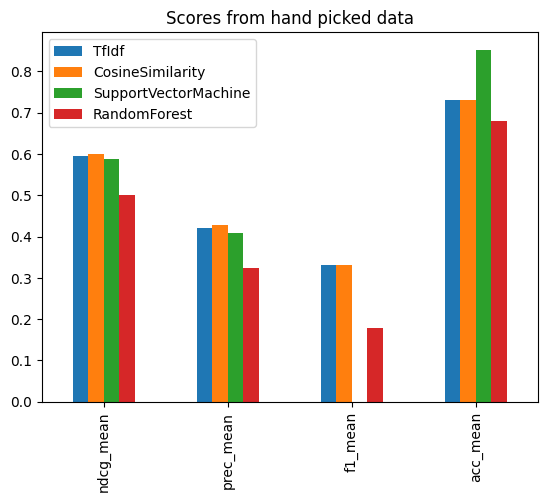

In [10]:
r = requests.get("http://127.0.0.1:5000/api/model/score")
assert r.status_code == 200
data = r.json()
pd.DataFrame(data).plot.bar()
plt.title("Scores from hand picked data")

### Random forest tunning

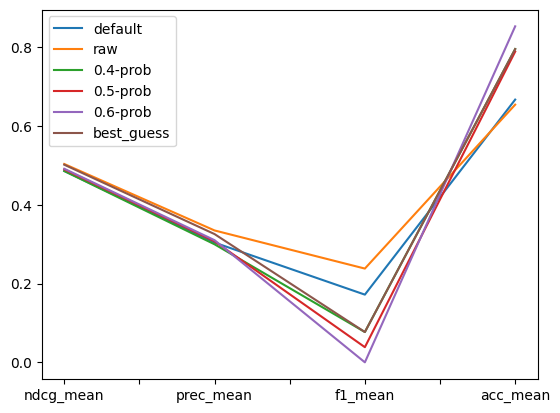

In [11]:
r = requests.get("http://127.0.0.1:5000/api/model/tune/randomforest")
assert r.status_code == 200
data = r.json()

pd.DataFrame(data).plot()
get_highest(data)

In [12]:
from os import listdir
from os.path import isfile, join
def load_data():
    PATH = "../data/" 
    contents = []
    files = [f"{PATH}{f}" for f in listdir(PATH) if isfile(join(PATH, f))]
    for file_path in files:
        with open(file_path, "r") as f:
            try:
                contents.append(f.read())
            except: 
                print("Problem reading:",f.name)
                continue
    return files, contents 

files, _ = load_data()
files

['../data/svelte_README.md',
 '../data/tensorflow_README.md',
 '../data/QmYaMCtgVF46b5jTJ9n95F5yTgw9ZYCRNupBeJrvnphjTW',
 '../data/react_README.md',
 '../data/vuejs_README.md',
 '../data/gcc_README.txt',
 '../data/linux_README.txt',
 '../data/cpython_README.rst',
 '../data/QmNb2LcaN8hzSNp4g7z8FtLsqvNyo3XDiR1gnDna1TWMqe',
 '../data/pytorch_README.md',
 '../data/rust_README.md',
 '../data/cira_README.md']